# Assignment 9

### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

**Data**

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np

maxi = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
mini = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Min and max temperature')

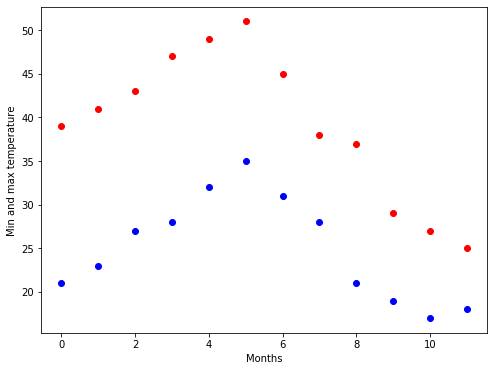

In [2]:
import matplotlib.pyplot as plt

months = np.arange(12)
plt.figure(figsize=(8,6))
plt.plot(months, maxi, 'ro')
plt.plot(months, mini, 'bo')
plt.xlabel('Months')
plt.ylabel('Min and max temperature')

### Task:

**1. Fitting it to the periodic function**

In [4]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, maxi, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, mini, [-40, 20, 0])

**2. Plot the fit**

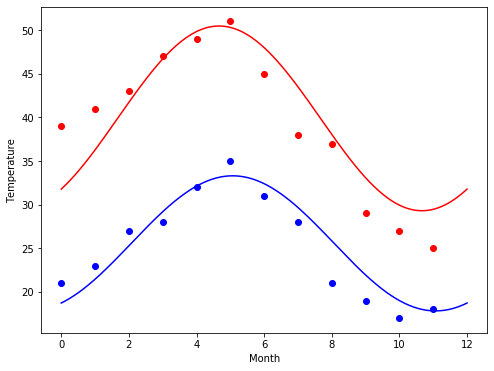

In [5]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,6))
plt.plot(months, maxi, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, mini, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

### Titanic dataset visualization using matplotlib:

**Data**
**https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv**

In [7]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df = pd.read_csv(url)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**1. Create a pie chart presenting the male/female proportion**

In [8]:
gender = df['sex'].astype('category')
gender = gender.cat.codes
gender.head()

0    0
1    1
2    0
3    1
4    0
dtype: int8

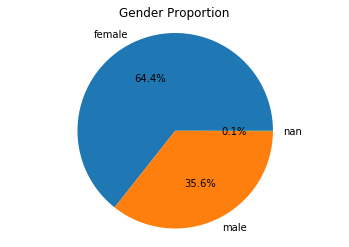

In [10]:
plt.pie(gender.value_counts(), labels = df['sex'].unique(), autopct='%1.1f%%')
plt.title('Gender Proportion')
plt.axis('equal')
plt.show()

**2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender**

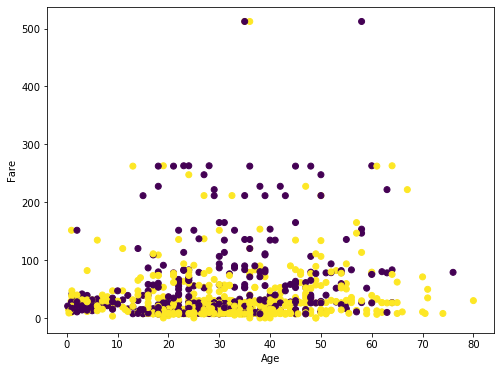

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['fare'], c = gender)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()